The Toronto Municipal Election is scheduled for October 22, 2018. Incumbent mayor John Tory is running for re-election, but there is expected to be a lot of change in terms of those governing the city.
Toronto City Council has added the new wards in the downtown core to account fo the rising growth in population at the city center. In addition to that, some current councillors are not running for re-election.
I would like to do some analysis on the campaign contributions to candidates running for mayor and councillor positions. Who received the most campagin contributions? Has anyone received the most donations for their position in their ward, but fail to win the election? Who is contributing the most money to these elections? These are some questions I'd like to answer using real election data.

Data was obtained from the City of Toronto Open Data Catalogue: https://www.toronto.ca/city-government/data-research-maps/open-data/open-data-catalogue/#347a08a6-e047-f710-898a-f97a29c9287b

# Step 1: Import the data for the last 3 elections

In [1]:
# Add libraries
import pandas as pd

In [2]:
# To import csv files use pd.read_csv()
# Import Councillors data from 2006
Councillors = pd.ExcelFile('C:/Users/sarefeen/Downloads/CTEC/City of Toronto Election Contributions/2006/2006_contribution_2-Councillor.xls').parse('Councillor')
#Councillors = pd.ExcelFile('D:/Dropbox/Data/City of Toronto Election Contributions/2006/2006_contribution_2-Councillor.xls').parse('Councillor')
# Add a new column for the year of the election
Councillors['Year'] = 2006

# Step 2: Merge Data and add new fields to identify type and year of election

In [3]:
# Import 2010 and 2014 data and append it to the main dataframe. Create a new column to indicate the year of election
years = ['2010','2014']
for year in years:
    # Pull in year data into a temporary dataframe
    temp_df = pd.ExcelFile('C:/Users/sarefeen/Downloads/CTEC/City of Toronto Election Contributions/'+year+'/'+year+'_contribution_2-Councillor.xls').parse('Councillor')
    #temp_df = pd.ExcelFile('D:/Dropbox/Data/City of Toronto Election Contributions/'+year+'/'+year+'_contribution_2-Councillor.xls').parse('Councillor')
    
    # Add a new column for the year of the election
    temp_df['Year'] = year
    
    # Concatinate the temporary dataframe to the original 2006 data
    # Any idea why we didn't just append the data?
    Councillors = pd.concat([Councillors,temp_df])
    
    # Delete temporary dataframe to avoid any loading issues. Might be overkill as python can easily rewrite variables
    del temp_df

# Print the consolidated dataframe    
Councillors

,,AMOUNT,Authorized Representative,CANDIDATE,CONTRIBUTIONTYPE,CONTRIBUTIONTYPEDESC,CONTRIBUTORTYPE,CONTRIBUTORTYPEDESC,CONTRIBUTOR_ADDRESS,CONTRIBUTOR_NAME,CONTRIBUTOR_POSTAL_CODE,Cheque Signatory,Goods or Service Desc,OFFICE,OFFICE_TYPE,President/ Business Manager,RELATIONSHIP,Relationship to Candidate,WARD_NO,Year
0,,300.0,NaN,"Dominelli, Fred",CT0001,Cash,CR0002,Corporation,"P.O. Box 7211, 7700 Pine Valley Drive, Woodbridge",(132585) Ontario Limited,L4L 8X8,NaN,NaN,Councillor,2.0,NaN,NaN,NaN,17,2006
1,,500.0,NaN,"McCormick, Suzanne",CT0001,Cash,CR0002,Corporation,"30 Booth Ave., Suite 100, Toronto",1001411 Ontario Limited,M4M 2M2,NaN,NaN,Councillor,2.0,NaN,NaN,NaN,30,2006
2,,250.0,NaN,"McCormick, Suzanne",CT0001,Cash,CR0002,Corporation,"30 Booth Ave., Suite 100, Toronto",1001411 Ontario Limited,M4M 2M2,NaN,NaN,Councillor,2.0,NaN,NaN,NaN,30,2006
3,,350.0,NaN,"Miller, Andrew",CT0001,Cash,CR0002,Corporation,"35 West Pearce St., Suite 32, Richmond Hill",1007749 Ontario Ltd.,L4B 3A9,NaN,NaN,Councillor,2.0,NaN,NaN,NaN,23,2006
4,,500.0,NaN,"Filion, John",CT0001,Cash,CR0002,Corporation,"5025 Yonge St., Toronto",1095195 Ontario Ltd.,M2N 5P2,NaN,NaN,Councillor,2.0,NaN,NaN,NaN,23,2006
5,,300.0,NaN,"Thompson, Michael",CT0001,Cash,CR0002,Corporation,"2300 Lawrence Ave E, Toronto",1132259 Ontario Ltd White Shield Banquet Halls,M1P 2R2,NaN,NaN,Councillor,2.0,NaN,NaN,NaN,37,2006
6,,350.0,NaN,"Mammoliti, Giorgio",CT0001,Cash,CR0002,Corporation,"873 Queen St. W., Toronto",1173044 Ontario Limited,M6J 1G4,NaN,NaN,Councillor,2.0,NaN,NaN,NaN,7,2006
7,,750.0,NaN,"Thompson, Michael",CT0001,Cash,CR0002,Corporation,"578 Front St W, Toronto",1189905 Ontario Inc Harley Davison of Toronto,M5V 1C1,NaN,NaN,Councillor,2.0,NaN,NaN,NaN,37,2006
8,,750.0,NaN,"Mammoliti, Giorgio",CT0001,Cash,CR0002,Corporation,"170 Doughton Road, Concord",1193489 Ontario Limited,L7K 1R4,NaN,NaN,Councillor,2.0,NaN,NaN,NaN,7,2006
9,,250.0,NaN,"Ainslie, Paul",CT0001,Cash,CR0002,Corporation,"Unit 18 1940 Ellesmere rd., Toronto",12106 70 Ontario Inc. O/A Scarborough City Cab,M1H 2V7,NaN,NaN,Councillor,2.0,NaN,NaN,NaN,43,2006


# Step 3: Clean dataset

In [4]:
# Get First Column from the dataframe
Councillors[Councillors.columns[0]]

0           
1           
2           
3           
4           
5           
6           
7           
8           
9           
10          
11          
12          
13          
14          
15          
16          
17          
18          
19          
20          
21          
22          
23          
24          
25          
26          
27          
28          
29          
        ... 
11005    NaN
11006    NaN
11007    NaN
11008    NaN
11009    NaN
11010    NaN
11011    NaN
11012    NaN
11013    NaN
11014    NaN
11015    NaN
11016    NaN
11017    NaN
11018    NaN
11019    NaN
11020    NaN
11021    NaN
11022    NaN
11023    NaN
11024    NaN
11025    NaN
11026    NaN
11027    NaN
11028    NaN
11029    NaN
11030    NaN
11031    NaN
11032    NaN
11033    NaN
11034    NaN
Name:  , Length: 31586, dtype: object

In [5]:
# Drop the first column of nulls and other columns that wont be used
Councillors = Councillors.drop(Councillors.columns[[0,2,4,6,-3,-4,-5,-8,-9]], axis=1)
Councillors

,AMOUNT,CANDIDATE,CONTRIBUTIONTYPEDESC,CONTRIBUTORTYPEDESC,CONTRIBUTOR_ADDRESS,CONTRIBUTOR_NAME,CONTRIBUTOR_POSTAL_CODE,OFFICE,OFFICE_TYPE,WARD_NO,Year
0,300.0,"Dominelli, Fred",Cash,Corporation,"P.O. Box 7211, 7700 Pine Valley Drive, Woodbridge",(132585) Ontario Limited,L4L 8X8,Councillor,2.0,17,2006
1,500.0,"McCormick, Suzanne",Cash,Corporation,"30 Booth Ave., Suite 100, Toronto",1001411 Ontario Limited,M4M 2M2,Councillor,2.0,30,2006
2,250.0,"McCormick, Suzanne",Cash,Corporation,"30 Booth Ave., Suite 100, Toronto",1001411 Ontario Limited,M4M 2M2,Councillor,2.0,30,2006
3,350.0,"Miller, Andrew",Cash,Corporation,"35 West Pearce St., Suite 32, Richmond Hill",1007749 Ontario Ltd.,L4B 3A9,Councillor,2.0,23,2006
4,500.0,"Filion, John",Cash,Corporation,"5025 Yonge St., Toronto",1095195 Ontario Ltd.,M2N 5P2,Councillor,2.0,23,2006
5,300.0,"Thompson, Michael",Cash,Corporation,"2300 Lawrence Ave E, Toronto",1132259 Ontario Ltd White Shield Banquet Halls,M1P 2R2,Councillor,2.0,37,2006
6,350.0,"Mammoliti, Giorgio",Cash,Corporation,"873 Queen St. W., Toronto",1173044 Ontario Limited,M6J 1G4,Councillor,2.0,7,2006
7,750.0,"Thompson, Michael",Cash,Corporation,"578 Front St W, Toronto",1189905 Ontario Inc Harley Davison of Toronto,M5V 1C1,Councillor,2.0,37,2006
8,750.0,"Mammoliti, Giorgio",Cash,Corporation,"170 Doughton Road, Concord",1193489 Ontario Limited,L7K 1R4,Councillor,2.0,7,2006
9,250.0,"Ainslie, Paul",Cash,Corporation,"Unit 18 1940 Ellesmere rd., Toronto",12106 70 Ontario Inc. O/A Scarborough City Cab,M1H 2V7,Councillor,2.0,43,2006


In [6]:
# Identify difference between Cash and Monetary values
Councillors.groupby(['Year','CONTRIBUTIONTYPEDESC']).size()

Year  CONTRIBUTIONTYPEDESC
2006  Cash                     8609
      Goods/Services             76
2010  Cash                    11746
      Goods/Services            120
2014  Goods/Services            162
      Monetary                10873
dtype: int64

In [7]:
# Consolidate Cash and Monetary fields
Councillors['CONTRIBUTIONTYPEDESC'] = Councillors['CONTRIBUTIONTYPEDESC'].replace('Cash', 'Monetary')
Councillors.groupby(['Year','CONTRIBUTIONTYPEDESC']).size()

Year  CONTRIBUTIONTYPEDESC
2006  Goods/Services             76
      Monetary                 8609
2010  Goods/Services            120
      Monetary                11746
2014  Goods/Services            162
      Monetary                10873
dtype: int64

# Step 4: Run analysis

In [8]:
import matplotlib.pyplot as plt

In [31]:
Total_Donations_by_ward = Councillors.groupby(['CANDIDATE', 'WARD_NO']).agg({'AMOUNT':'sum'})
Total_Donations_by_ward

,,AMOUNT
CANDIDATE,WARD_NO,
"Abukar, Munira",2,17100.00
"Acerra, Daniela",24,664.00
"Adams, John",21,4200.00
"Adeoba, Benn",2,8543.25
"Agaliotis, Peter",31,3450.00
"Ahmad, Malik",35,6900.00
"Ahmed, Atiya",34,9900.00
"Ahmed, Kamal",27,874.54
"Ahmed, Sharif",35,5810.00


In [77]:
Total_Donations = Councillors.groupby(['CANDIDATE']).agg({'AMOUNT':'sum'})
Total_Donations = Total_Donations.nlargest(15, 'AMOUNT')
Total_Donations

,AMOUNT
CANDIDATE,
"Kelly, Norm",281630.60
"Thompson, Michael",215260.12
"Mammoliti, Giorgio",212579.00
"Augimeri, Maria",189360.87
"De Baeremaeker, Glenn",177382.00
"Grimes, Mark",169614.50
"Cho, Raymond",162380.00
"Berardinetti, Michelle",139109.78
"Robertson, David",139000.00


([<matplotlib.patches.Wedge at 0x65cc7eb8>,
 [Text(-0.446416,1.16757,'281630.6'),
  Text(-0.931237,0.58549,'215260.12'),
  Text(-1.09998,0.00713235,'212579.0'),
  Text(-0.957474,-0.54152,'189360.87'),
  Text(-0.603299,-0.919799,'177382.0'),
  Text(-0.143204,-1.09064,'169614.5'),
  Text(0.325017,-1.05089,'162380.0'),
  Text(0.700951,-0.847743,'139109.78'),
  Text(0.955,-0.545871,'139000.0'),
  Text(1.08497,-0.181212,'133824.77'),
  Text(1.08414,0.186137,'124925.0'),
  Text(0.97177,0.515424,'120027.52'),
  Text(0.767599,0.787903,'119640.0'),
  Text(0.490462,0.984605,'119575.0'),
  Text(0.168239,1.08706,'118412.5')])

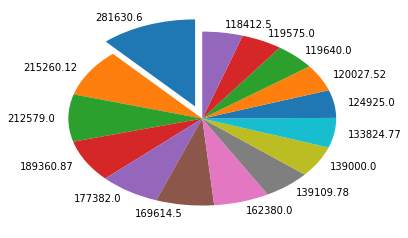

In [78]:
plt.pie(
    # using data total)arrests
    Total_Donations['AMOUNT'],
    # with the labels being officer names
    labels=Total_Donations[Total_Donations.columns[0]],
    # with one slide exploded out
    explode=(0.15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
    # with the start angle at 90%
    startangle=90
    )

# Step 5: Export to excel to open in Tableau

In [81]:
Councillors.to_csv('candidates_tableau_ready.csv', encoding='utf-8', index=False)